In [5]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pd.set_option('display.max_columns',None)

In [6]:
df = pd.read_csv('marketing_campaign_data.csv',index_col=0)# untuk menghilangkan kolom unnamed menggunakan index_col=0
df.info () # cross cek tipe data
# melakukan imputasi data pada kolom income
# merubah type data kolom income  dan dt_customer

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   int64 

In [7]:
df = df.drop(columns='ID',axis=1)
df['Income'] = df['Income'].fillna(0) # karena setiap orang memiliki income berbeda dan privasi
# mengubah type data
df['Income'] = df['Income'].astype(int)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format= '%d-%m-%Y')

In [8]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,S1,Lajang,58138000,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1954,S1,Lajang,46344000,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,1965,S1,Bertunangan,71613000,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,1984,S1,Bertunangan,26646000,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,1981,S3,Menikah,58293000,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


##  Feature Engineering

In [9]:
# mengembalikan semua data yang memiliki visit >0
df_visit = df[df['NumWebVisitsMonth']>0]

# calculate the conversion rate per respondent
df_visit['Con_rate'] = df_visit['Response'] / df_visit['NumWebVisitsMonth']

# create columns Total Customer
df_visit['Ttl_customer'] = df_visit['Kidhome'] + df_visit['Teenhome']

# Create columns Age
df_visit['Year_customer'] = df_visit['Dt_Customer'].dt.year
df_visit['Age'] = df_visit['Year_customer'] - df_visit['Year_Birth']

# Grouping Age
df_visit['Group_Age'] = df_visit['Age'].apply(lambda x : 'Teeneger' if x <= 25 else
                                   ('adult' if x <= 45 else
                                   ('MiddleAge' if x <60 else 'ederly')))

In [10]:
df_visit.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Con_rate,Ttl_customer,Year_customer,Age,Group_Age
0,1957,S1,Lajang,58138000,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0.142857,0,2012,55,MiddleAge
1,1954,S1,Lajang,46344000,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0.000000,2,2014,60,ederly
2,1965,S1,Bertunangan,71613000,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0.000000,0,2013,48,MiddleAge
3,1984,S1,Bertunangan,26646000,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0.000000,1,2014,30,adult
4,1981,S3,Menikah,58293000,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0.000000,1,2014,33,adult


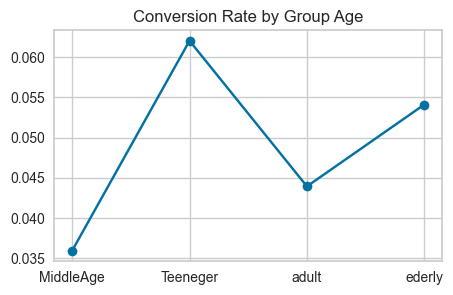

In [11]:
conversion_rate = df_visit.groupby('Group_Age').agg({'Con_rate' : 'mean'}).reset_index()
plt.figure(figsize=(5,3))
plt.plot(conversion_rate['Group_Age'],conversion_rate['Con_rate'],marker ='o', linestyle='-', color='b')
plt.title('Conversion Rate by Group Age')
plt.show()

- From the results of the analysis the highest conversion rates were in Teeneger.
- There needs to be optimization of conversion actions in order to identify which factors contribute high to successful conversions.
- Likewise for the Middle Age group, it is necessary to identify what needs to be done to be able to increase the conversion value. Optimizing the display of campaigns that suit the needs of the Middle Age group.

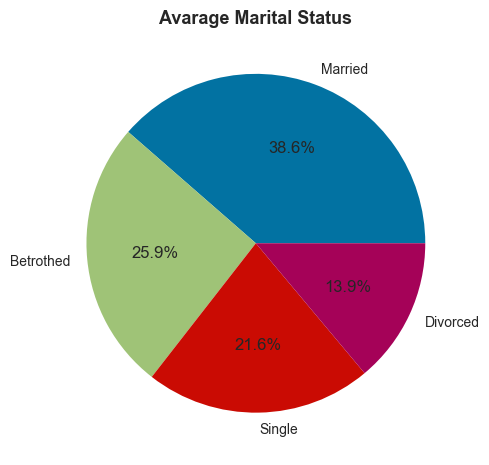

In [12]:
# melakukan mapping untuk mempermudah visulaisasi
marital_mapping  = {'Menikah':'Menikah', 'Bertunangan':'Bertunangan', 'Lajang':'Lajang', 'Cerai':'Cerai', 'Janda':'Cerai', 'Duda':'Cerai'}
df_visit['Marital_Status'] = df_visit['Marital_Status'].map(marital_mapping)

# Menghitung count untuk setiap Status pernikahan
MaritalStatus = df_visit['Marital_Status'].value_counts()

# Menghitung persentase rata-rata untuk setiap nilai
MaritalStatusPercentage = (MaritalStatus / len(df_visit)) * 100

labels =['Married', 'Betrothed', 'Single', 'Divorced']
# Membuat visualisasi dengan diagram lingkaran (pie chart)
fig, ax = plt.subplots()
ax.pie(MaritalStatusPercentage,labels=labels ,autopct='%1.1f%%')
ax.set_aspect('equal')  # Mengatur aspek lingkaran agar terlihat bulat

plt.title('Avarage Marital Status', weight='bold', fontsize=13)
plt.show()

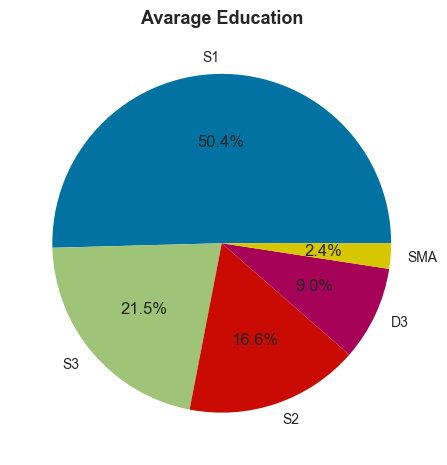

In [13]:
# Menghitung count untuk setiap Status Pendidikan
Pendidikan = df_visit['Education'].value_counts()

# Menghitung persentase rata-rata untuk setiap nilai
PendidikanPercentage = (Pendidikan / len(df_visit)) * 100

labels =['S1', 'S3', 'S2', 'D3','SMA']
# Membuat visualisasi dengan diagram lingkaran (pie chart)
fig, ax = plt.subplots()
ax.pie(PendidikanPercentage,labels=labels ,autopct='%1.1f%%')
ax.set_aspect('equal')  # Mengatur aspek lingkaran agar terlihat bulat

plt.title('Avarage Education', weight='bold', fontsize=13)
plt.show()

<Figure size 500x300 with 0 Axes>

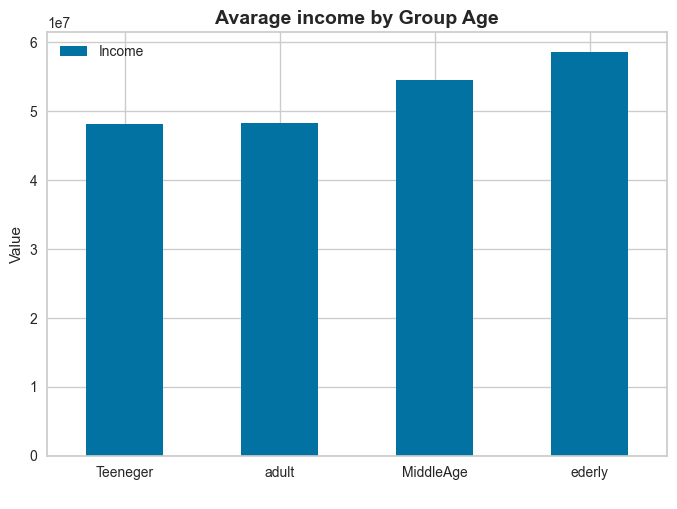

In [14]:
# membuat tabel berisi informasi rata-rata pendapatan per kelompok usia
avg_inco = df_visit.groupby('Group_Age').agg({'Income':'mean'}).sort_values(by='Income').reset_index()

# membuat plot bar
plt.figure(figsize=(5,3))
avg_inco.plot('Group_Age','Income', kind ='bar')
plt.xlabel(' ')
plt.ylabel ('Value')
plt.title('Avarage income by Group Age',fontsize =14, weight='bold')
plt.xticks(rotation=0)
plt.show()

In [15]:
df_visit.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Con_rate,Ttl_customer,Year_customer,Age,Group_Age
0,1957,S1,Lajang,58138000,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0.142857,0,2012,55,MiddleAge
1,1954,S1,Lajang,46344000,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0.000000,2,2014,60,ederly
2,1965,S1,Bertunangan,71613000,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0.000000,0,2013,48,MiddleAge
3,1984,S1,Bertunangan,26646000,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0.000000,1,2014,30,adult
4,1981,S3,Menikah,58293000,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0.000000,1,2014,33,adult


In [16]:
# melakukan One hot encoder
from sklearn.preprocessing import OneHotEncoder
kategorikal = df_visit[['Education','Marital_Status','Group_Age']]
name_col = ['Education','Marital_Status','Group_Age']
# menginisialisasi parameter
encode = OneHotEncoder(sparse=False)
# melakukan label encoding dan mengubah kedalam bentuk DataFrame
one_hot= pd.DataFrame(encode.fit_transform(kategorikal),
         columns=encode.get_feature_names_out(name_col))

# melakukan Standarisasi pada kolom numerikal
numerical = df_visit.select_dtypes(exclude=['object','datetime64'])
scaler = StandardScaler()
df_scaler = scaler.fit_transform(numerical)
data_scaler = pd.DataFrame(df_scaler, columns=numerical.columns)

# menggabung kedua data
combined_df = pd.concat([data_scaler,one_hot], axis=1)
combined_df

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Con_rate,Ttl_customer,Year_customer,Age,Education_D3,Education_S1,Education_S2,Education_S3,Education_SMA,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Lajang,Marital_Status_Menikah,Group_Age_MiddleAge,Group_Age_Teeneger,Group_Age_adult,Group_Age_ederly
0,-0.986519,0.264904,-0.828645,-0.933088,0.308958,0.981406,1.556014,1.735904,2.475009,1.472747,0.850489,0.358204,1.423217,2.590210,-0.554358,0.689631,-0.280885,-0.283664,-0.280885,-0.262802,-0.116801,-0.097524,0.0,0.0,2.381943,0.693755,-1.270492,-1.501704,0.898047,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-1.236892,-0.203443,1.027686,0.905863,-0.382267,-0.870552,-0.636803,-0.722635,-0.649633,-0.631582,-0.732109,-0.169513,-1.124563,-0.576286,-1.172036,-0.142631,-0.280885,-0.283664,-0.280885,-0.262802,-0.116801,-0.097524,0.0,0.0,-0.419825,-0.305605,1.393597,1.424256,1.314037,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.318855,0.800005,-0.828645,-0.933088,-0.797002,0.361119,0.573027,-0.171740,1.353814,-0.147828,-0.037310,-0.697231,1.423217,-0.224453,1.298676,-0.558761,-0.280885,-0.283664,-0.280885,-0.262802,-0.116801,-0.097524,0.0,0.0,-0.419825,-0.305605,-1.270492,-0.038724,0.315660,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.266846,-0.985663,1.027686,-0.933088,-0.797002,-0.870552,-0.561188,-0.658895,-0.502591,-0.583207,-0.751409,-0.169513,-0.760595,-0.928119,-0.554358,0.273500,-0.280885,-0.283664,-0.280885,-0.262802,-0.116801,-0.097524,0.0,0.0,-0.419825,-0.305605,0.061553,1.424256,-1.181905,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.016472,0.271059,1.027686,-0.933088,1.553164,-0.389755,0.421799,-0.212715,0.159098,-0.002702,-0.558409,1.413638,0.331311,0.127380,0.063320,-0.142631,-0.280885,-0.283664,-0.280885,-0.262802,-0.116801,-0.097524,0.0,0.0,-0.419825,-0.305605,0.061553,1.424256,-0.932311,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,-0.151939,0.387411,-0.828645,0.905863,-0.105777,1.201029,0.421799,0.078667,0.085577,2.198378,3.919184,-0.169513,1.787185,0.127380,-0.554358,-0.142631,-0.280885,-0.283664,-0.280885,-0.262802,-0.116801,-0.097524,0.0,0.0,-0.419825,-0.305605,0.061553,-0.038724,0.149264,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2225,-1.904556,0.498244,2.884017,0.905863,0.239836,0.301761,-0.662007,-0.613366,-0.686394,-0.655770,-0.693509,2.469073,1.423217,-0.224453,-0.245519,0.689631,-0.280885,-0.283664,-0.280885,3.805150,-0.116801,-0.097524,0.0,0.0,-0.419825,-0.305605,2.725641,1.424256,1.979622,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2226,1.016472,0.218959,-0.828645,-0.933088,1.449480,1.791637,0.547823,0.238017,-0.098226,-0.365517,-0.384709,-0.697231,-0.760595,0.127380,2.225193,0.273500,-0.280885,3.525296,-0.280885,-0.262802,-0.116801,-0.097524,0.0,0.0,-0.419825,-0.305605,-1.270492,1.424256,-0.932311,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2227,-1.069977,0.705970,-0.828645,0.905863,-1.419105,0.367055,0.094136,0.224358,0.784026,0.069861,0.329390,-0.169513,0.695280,0.831045,1.298676,-0.974892,-0.280885,-0.283664,-0.280885,-0.262802,-0.116801,-0.097524,0.0,0.0,-0.419825,-0.305605,0.061553,1.424256,1.147641,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Elbow Method

Inertia Score for k = 1: 64640.24719605206
Inertia Score for k = 2: 52368.8597019567
Inertia Score for k = 3: 48172.47231934734
Inertia Score for k = 4: 45152.45364864314
Inertia Score for k = 5: 42896.91891400123
Inertia Score for k = 6: 40869.99263066318
Inertia Score for k = 7: 38798.6111900315
Inertia Score for k = 8: 37771.756285865304
Inertia Score for k = 9: 36664.32769501999


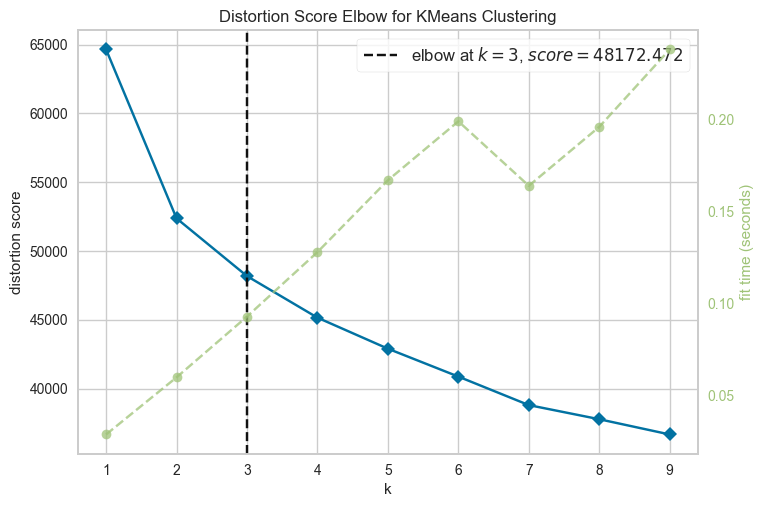

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
inertia = []
range_val = range(1,10)
random_state = 42
for i in range_val:
    kmean = KMeans(n_clusters=i, random_state=random_state)
    kmean.fit_predict(pd.DataFrame(combined_df))
    inertia.append(kmean.inertia_)

# display the inertia value
for k, score in enumerate(inertia, start=1):
    print(f"Inertia Score for k = {k}: {score}")

# create a visualization of inertia
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,10))

visualizer.fit(combined_df)        # Fit the data to the visualizer
visualizer.show()

## Silhouette Score

Silhouette Score for k = 2: 0.22540114162448938
Silhouette Score for k = 3: 0.1483436793693997
Silhouette Score for k = 4: 0.15308504188368655
Silhouette Score for k = 5: 0.10801997919571747
Silhouette Score for k = 6: 0.11444230207632894
Silhouette Score for k = 7: 0.11900747632648234
Silhouette Score for k = 8: 0.11311203232700488
Silhouette Score for k = 9: 0.12603880343187981
Silhouette Score for k = 10: 0.11875909259992308


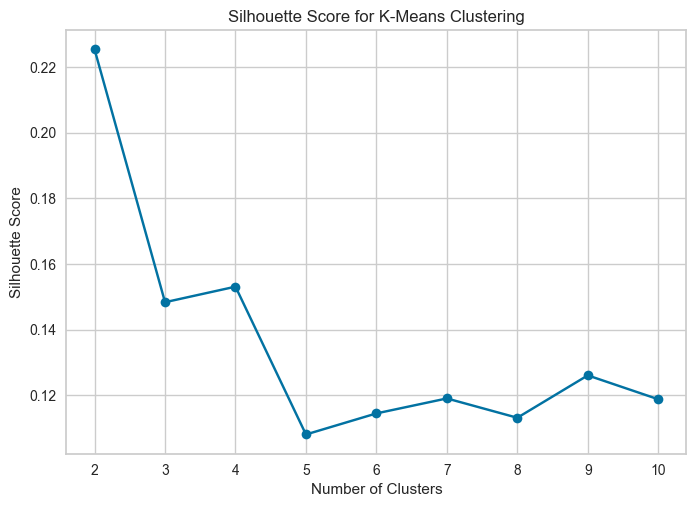

In [18]:
from sklearn.metrics import silhouette_score

# Initialize the list to store Silhouette Score values
silhouette_scores = []

# Perform iteration for the number of clusters from 2 to 11
for k in range(2, 11):
    # Create a KMeans object with k cluster count
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(combined_df)
    labels = kmeans.labels_

    # Calculating the value of the Silhouette Score
    score = silhouette_score(combined_df, labels)
    silhouette_scores.append(score)

# Displays the Silhouette Score value
for k, score in enumerate(silhouette_scores, start=2):
    print(f"Silhouette Score for k = {k}: {score}")

# Plot nilai Silhouette Score
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means Clustering')
plt.show()

From the results of the analysis, it was found that the optimal K value was = 3, as illustrated on the Silhouette chart, the density level is around 0.149, this density value is reflected in the average Silhouette score = 3.
Likewise, the Elbow results show that the optimal K value is 3.

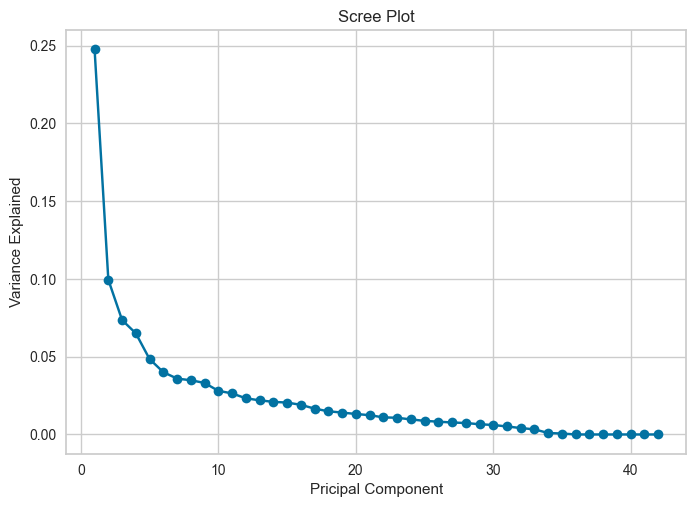

In [19]:
X = combined_df.values

# inisialisasi object PCA
pca = PCA()
pca.fit_transform(X)

# Get the variance explained by each component
explained_variance = pca.explained_variance_ratio_
# plot Scree plot
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel('Pricipal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.show()

The optimal value of PCA is 2.

In [20]:
# Create PCA
pca = PCA(n_components=2)
pricipal_component = pca.fit_transform(combined_df)
pca_df1 = pd.DataFrame(data = pricipal_component, columns=['PCA1','PCA2'])
pca_df1

,PCA1,PCA2
0,4.233432,0.309334
1,-2.598983,1.504683
2,1.859762,0.333055
3,-2.537576,-2.101716
4,-0.636995,-0.903407
...,...,...
2224,2.181138,1.500976
2225,-1.653819,3.580193
2226,1.583225,-1.048386
2227,1.621131,2.211443


In [21]:
# Create Kmeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(combined_df)
df_kmeans = pd.concat([pca_df1, pd.DataFrame({'Cluster':kmeans.labels_})],axis=1)
df_kmeans

,PCA1,PCA2,Cluster
0,4.233432,0.309334,1
1,-2.598983,1.504683,0
2,1.859762,0.333055,2
3,-2.537576,-2.101716,0
4,-0.636995,-0.903407,0
...,...,...,...
2224,2.181138,1.500976,2
2225,-1.653819,3.580193,2
2226,1.583225,-1.048386,1
2227,1.621131,2.211443,2


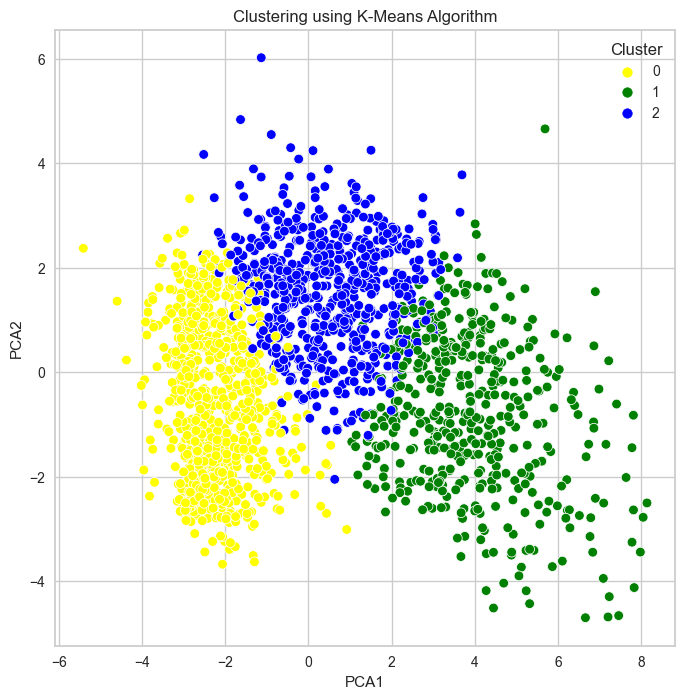

In [22]:
plt.figure(figsize =(8,8))
ax= sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data= df_kmeans, palette=['yellow','green','blue','black'])
plt.title('Clustering using K-Means Algorithm')
plt.show()

In [23]:
df_visit['Cluster'] = kmeans.labels_
df_visit

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Con_rate,Ttl_customer,Year_customer,Age,Group_Age,Cluster
0,1957,S1,Lajang,58138000,0,0,2012-09-04,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0.142857,0,2012,55,MiddleAge,1
1,1954,S1,Lajang,46344000,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0.000000,2,2014,60,ederly,0
2,1965,S1,Bertunangan,71613000,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0.000000,0,2013,48,MiddleAge,2
3,1984,S1,Bertunangan,26646000,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0.000000,1,2014,30,adult,0
4,1981,S3,Menikah,58293000,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0.000000,1,2014,33,adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,S1,Menikah,61223000,0,1,2013-06-13,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,0.000000,1,2013,46,MiddleAge,2
2236,1946,S3,Bertunangan,64014000,2,1,2014-06-10,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,0.000000,3,2014,68,ederly,2
2237,1981,S1,Cerai,56981000,0,0,2014-01-25,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,0.000000,0,2014,33,adult,1
2238,1956,S2,Bertunangan,69245000,0,1,2014-01-24,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,0.000000,1,2014,58,MiddleAge,2


<Axes: xlabel='Cluster', ylabel='count'>

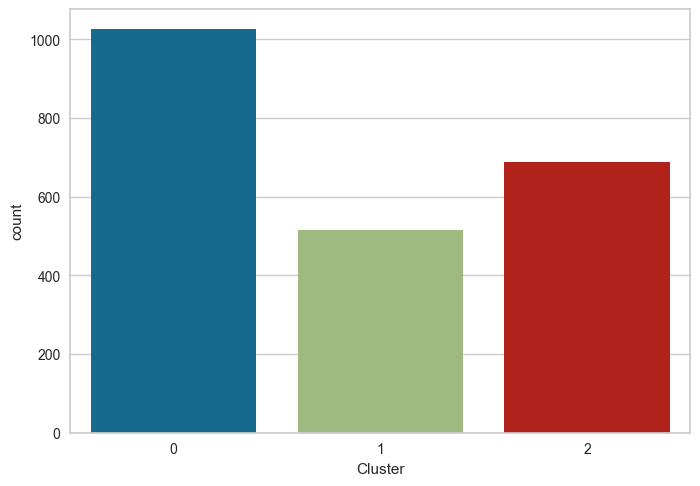

In [24]:
sns.countplot(x='Cluster',data= df_visit)

In [25]:
cl_0 =df_visit[df_visit['Cluster']==0]
cl_1 =df_visit[df_visit['Cluster']==1]
cl_2 =df_visit[df_visit['Cluster']==2]


## Cluster 0

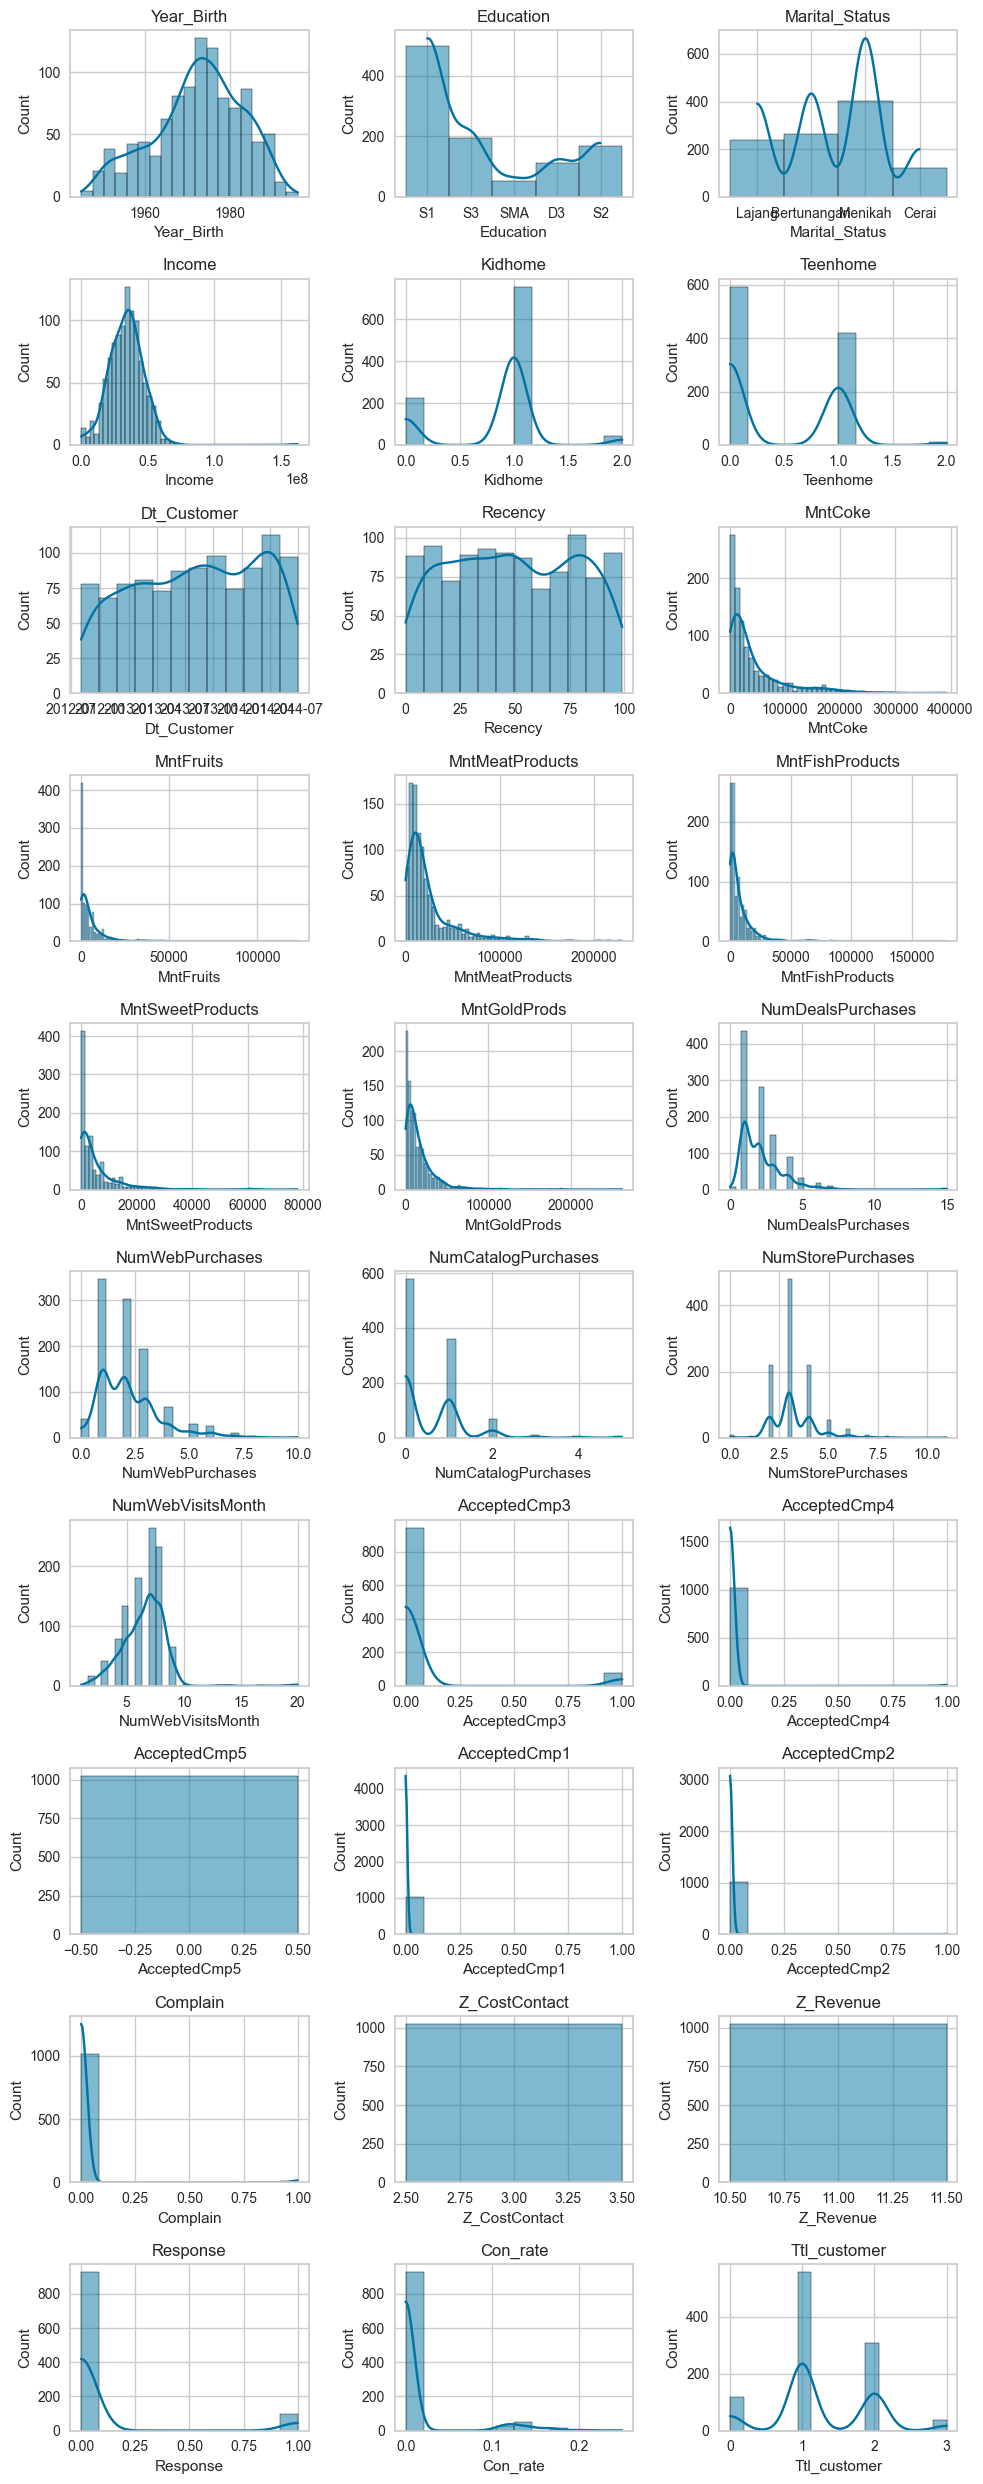

In [26]:
# Membuat objek subplot dengan ukuran 3x10
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(10, 25))

# Mengatur counter untuk mengakses subplot
counter = 0

# Melakukan iterasi untuk setiap kolom di cl_0 (kecuali kolom 'cluster')
for i, ax in zip(cl_0.drop(['Cluster'], axis=1), axes.flatten()):
    # Membuat grid untuk subplot
    grid = sns.histplot(data=cl_0, x=i, kde=True, ax=ax)

    # Menambahkan judul subplot
    ax.set_title(i)

    # Meningkatkan counter
    counter += 1

# Mengatur tata letak subplot
plt.tight_layout()

# Menampilkan plot
plt.show()


## Cluster 1

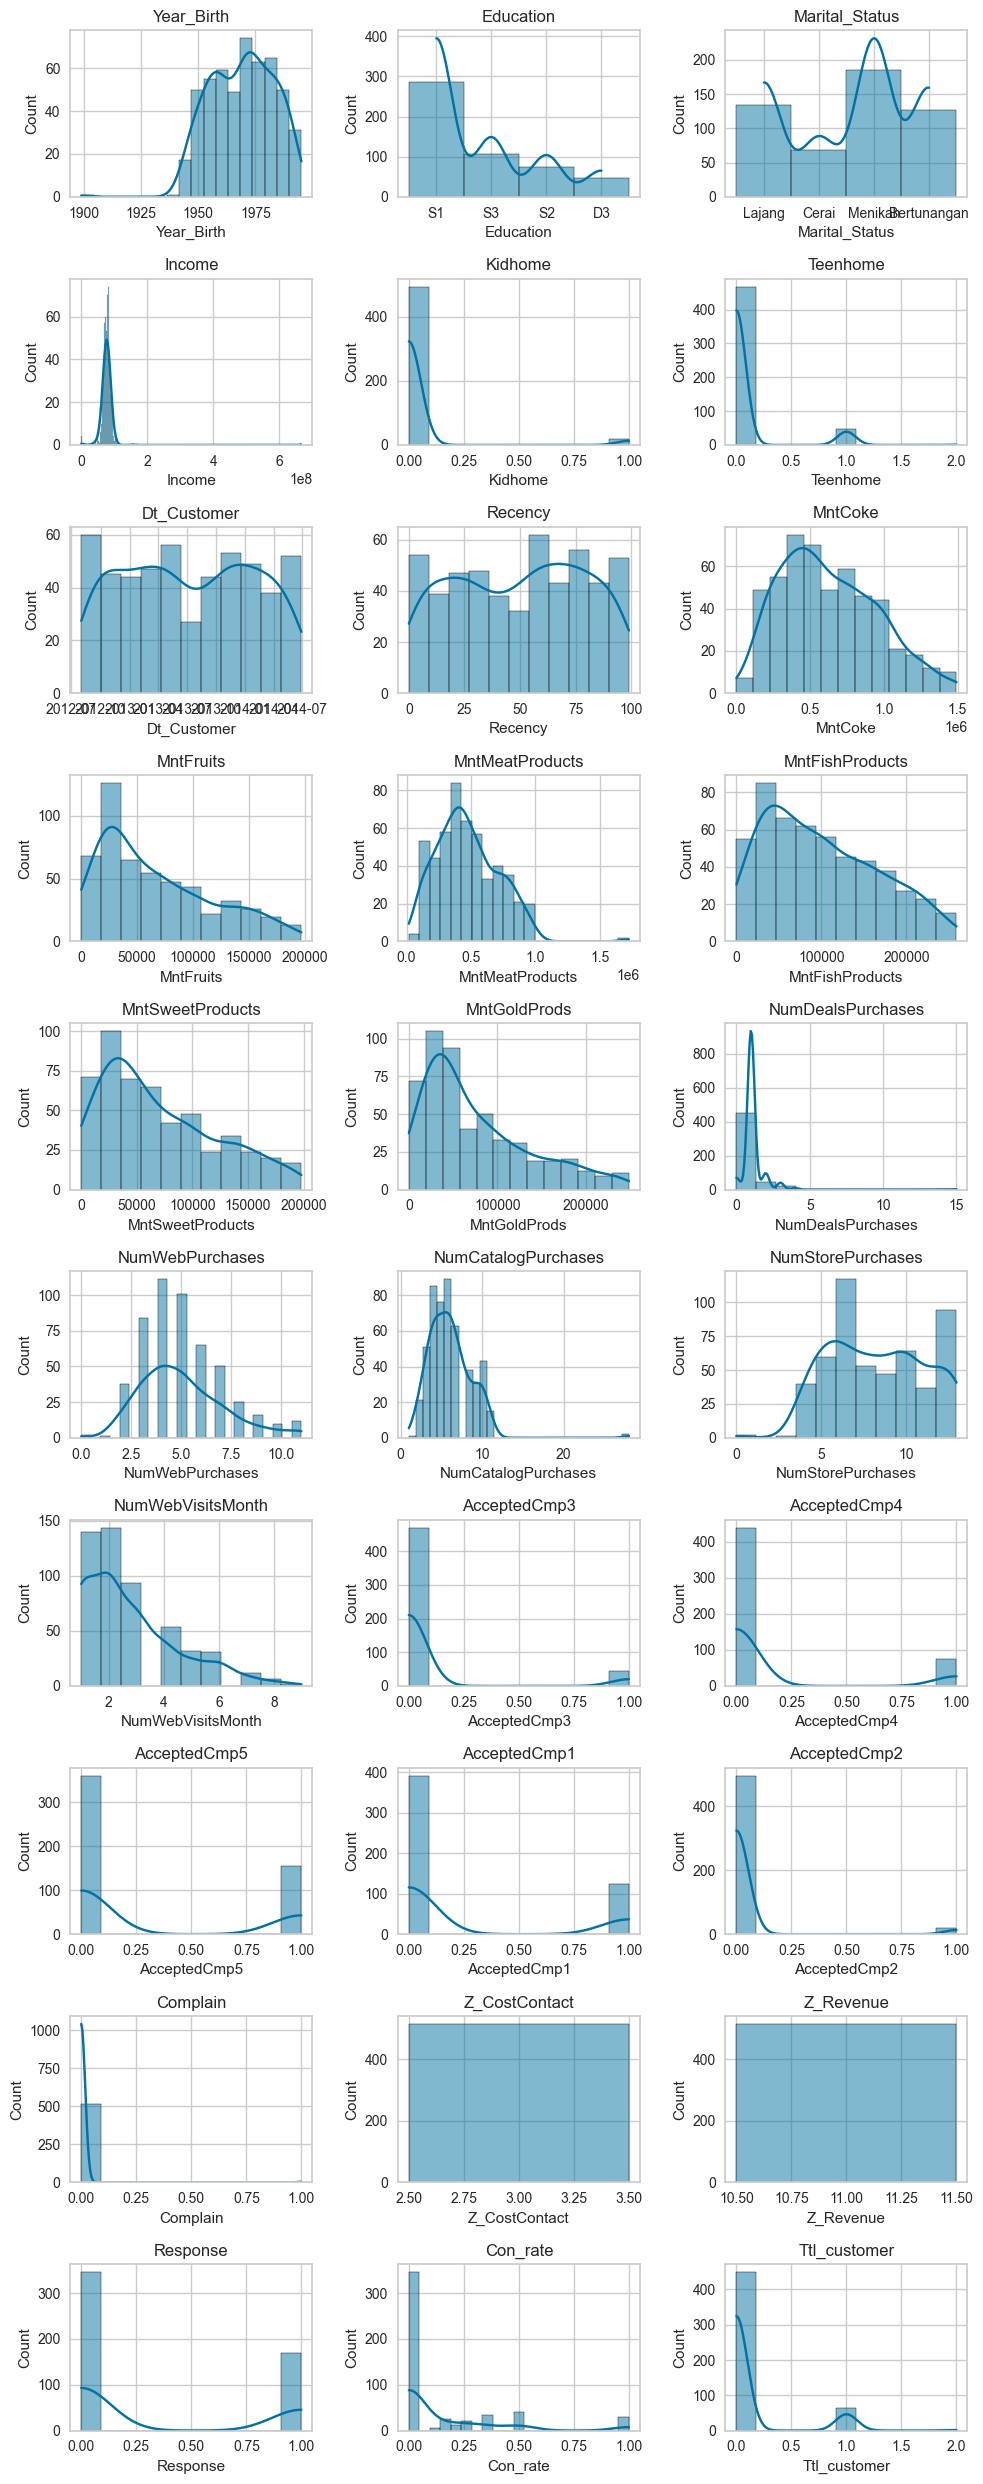

In [27]:
# Membuat objek subplot dengan ukuran 3x10
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(10, 25))

# Mengatur counter untuk mengakses subplot
counter = 0

# Melakukan iterasi untuk setiap kolom di cl_1 (kecuali kolom 'cluster')
for i, ax in zip(cl_1.drop(['Cluster'], axis=1), axes.flatten()):
    # Membuat grid untuk subplot
    grid = sns.histplot(data=cl_1, x=i, kde=True, ax=ax)

    # Menambahkan judul subplot
    ax.set_title(i)

    # Meningkatkan counter
    counter += 1

# Mengatur tata letak subplot
plt.tight_layout()

# Menampilkan plot
plt.show()

## Cluster 2

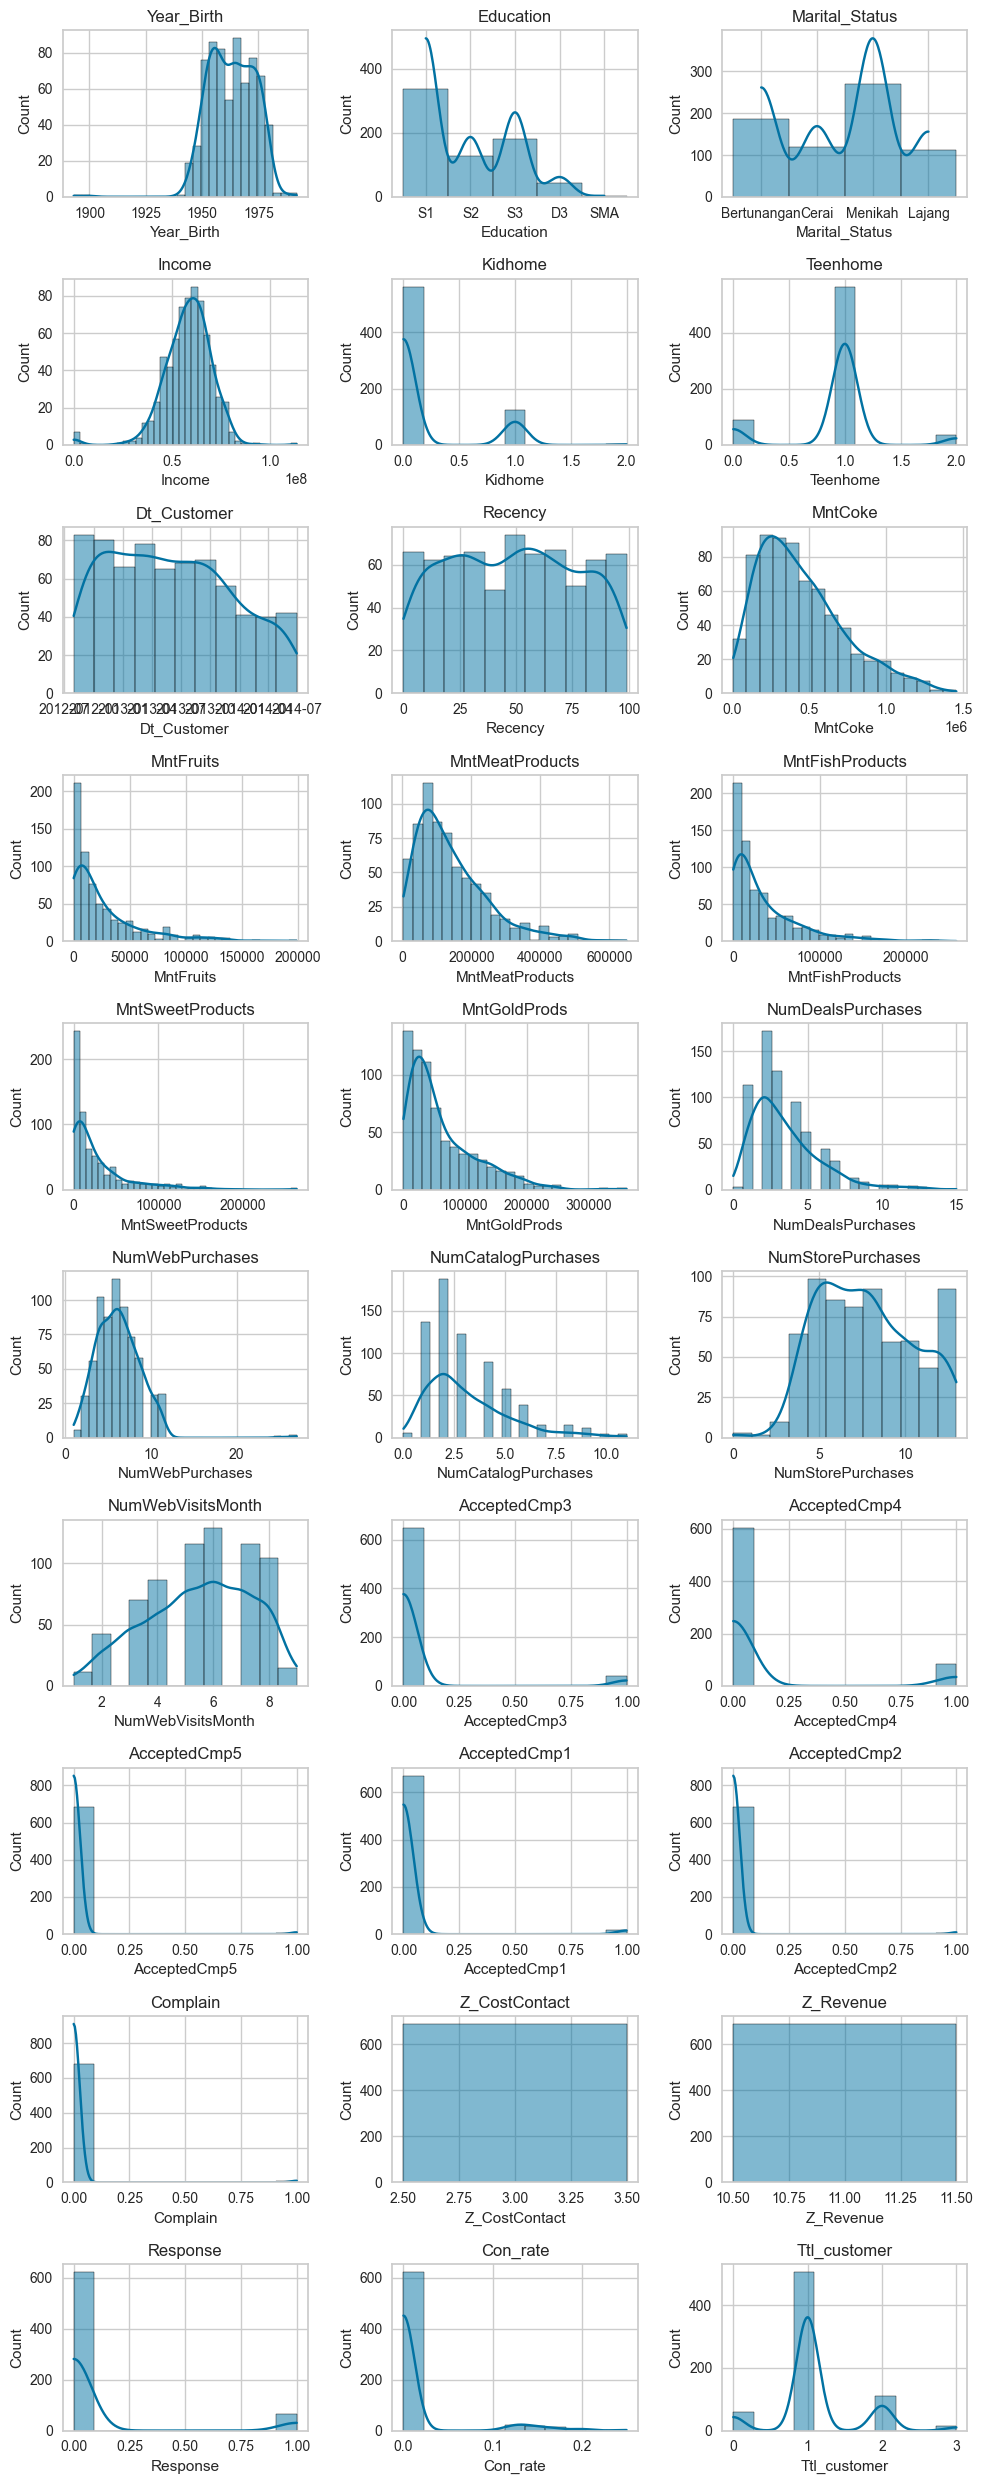

In [28]:
# Membuat objek subplot dengan ukuran 3x10
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(10, 25))

# Mengatur counter untuk mengakses subplot
counter = 0

# Melakukan iterasi untuk setiap kolom di cl_2 (kecuali kolom 'cluster')
for i, ax in zip(cl_2.drop(['Cluster'], axis=1), axes.flatten()):
    # Membuat grid untuk subplot
    grid = sns.histplot(data=cl_2, x=i, kde=True, ax=ax)

    # Menambahkan judul subplot
    ax.set_title(i)

    # Meningkatkan counter
    counter += 1

# Mengatur tata letak subplot
plt.tight_layout()

# Menampilkan plot
plt.show()

#  Marketing Retargeting

### Income

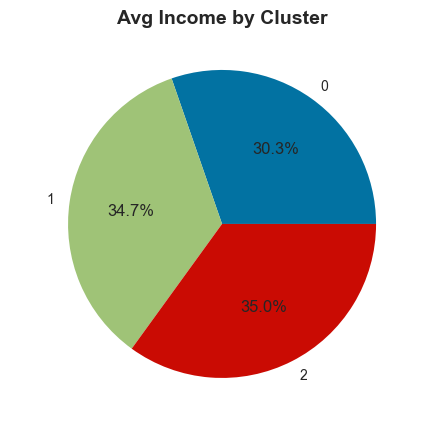

In [29]:
income_clu = df_visit.groupby('Cluster').agg({'Income':'sum'})
income_clu = (income_clu / len(df_visit))*100
fig, ax = plt.subplots(figsize=(7,5))
income_clu['Income'].plot(kind='pie', ax=ax, autopct='%1.1f%%')
plt.title('Avg Income by Cluster', fontsize=14, weight='bold')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()
#Among all the available data, it is evident that Cluster 2 exhibits the highest income value compared to the other clusters.

### Revenue Product

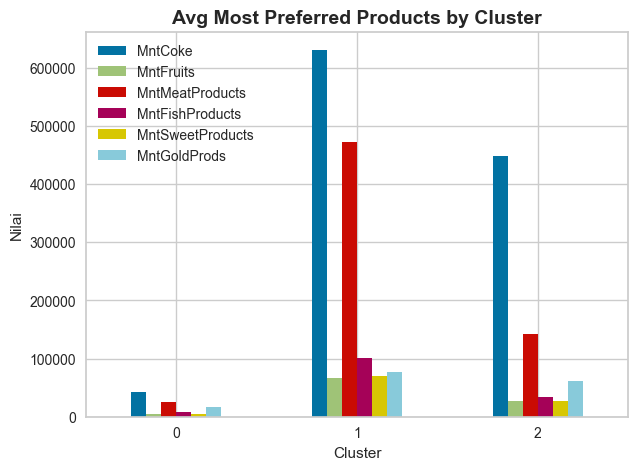

In [30]:
pro_rev_per_cluster = df_visit.groupby('Cluster').agg({'MntCoke':'mean',
                                  'MntFruits':'mean',
                                  'MntMeatProducts':'mean',
                                  'MntFishProducts':'mean',
                                  'MntSweetProducts':'mean',
                                  'MntGoldProds':'mean'})
# Membuat DataFrame dari data
df = pd.DataFrame(pro_rev_per_cluster)

# Membuat plot
fig, ax = plt.subplots(figsize=(7, 5))
df.plot(kind='bar', ax=ax)

# Menambahkan judul dan label sumbu
plt.title('Avg Most Preferred Products by Cluster', fontsize=14, weight='bold')
plt.xlabel('Cluster')
plt.ylabel('Nilai')

plt.xticks(rotation=0)
plt.legend()
# Menampilkan plot
plt.show()

# From all clusters, on average, the most preferred products are Coke and Meat.

### Complain

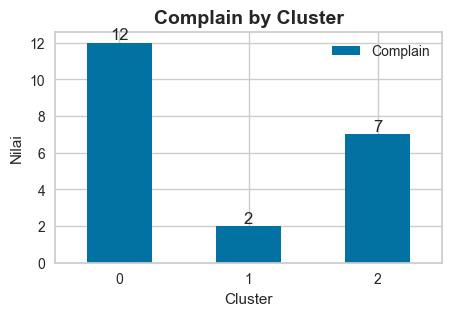

In [31]:
df_com = df_visit[df_visit['Complain']==1]
df_complain =df_com.groupby('Cluster').agg({'Complain':'sum'})

# Membuat plot
fig, ax = plt.subplots(figsize=(5,3))
df_complain.plot(kind='bar', ax=ax)

# Menambahkan judul dan label sumbu
plt.title('Complain by Cluster', fontsize = 14, weight='bold')
plt.xlabel('Cluster')
plt.ylabel('Nilai')

plt.xticks(rotation=0)
plt.legend()

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Menampilkan plot
plt.show()


### Response

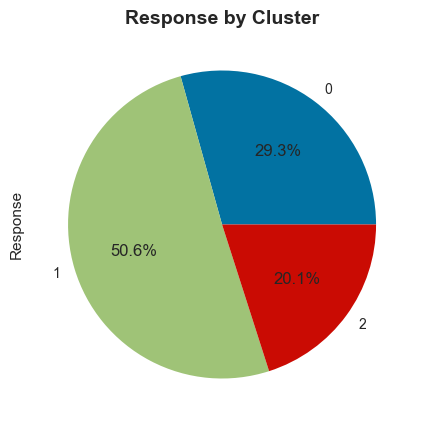

In [32]:
# Respon berdasarkan cluster dan dibagi dengan jumlah kluster masing-masing bukan dari jumlah keseluruhan dataset cluster
respon_cluster = df_visit.groupby('Cluster').agg({'Response':'sum'}).reset_index()
# Membuat plot
fig, ax = plt.subplots(figsize=(7, 5))
respon_cluster['Response'].plot(kind='pie', ax=ax, autopct='%1.1f%%')

# Menambahkan judul dan label sumbu
plt.title('Response by Cluster', fontsize = 14, weight='bold')

plt.show()


### Summary

After conducting the analysis, there are three types of clusters:

1. High Spender
2. Medium Spender
3. Risk Of Churn Spender
<br>

With the following explanations:

1. Risk Of Churn Spender:   Low income, low product revenue, the highest complaint rate, and moderately good product responses.

2. High Spender:   Moderate income, excellent product revenue, low complaint rate, and positive product responses.

3. Medium Spender:   High income, fair product revenue, the most complaints, and negative product responses.

## Traffic campaingn

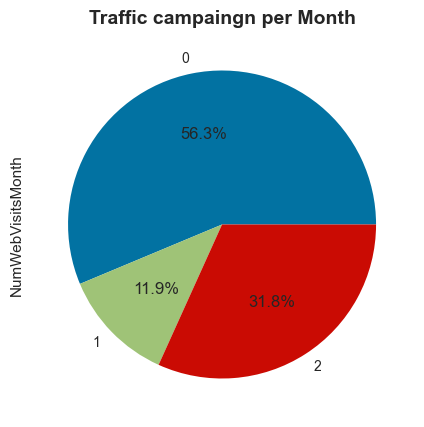

In [33]:
visit_web = df_visit.groupby('Cluster').agg({'NumWebVisitsMonth':'sum'})

# Membuat plot
fig, ax = plt.subplots(figsize=(7, 5))
visit_web['NumWebVisitsMonth'].plot(kind='pie', ax=ax, autopct='%1.1f%%')

# Menambahkan judul dan label sumbu
plt.title('Traffic campaingn per Month', fontsize = 14, weight='bold')

plt.show()

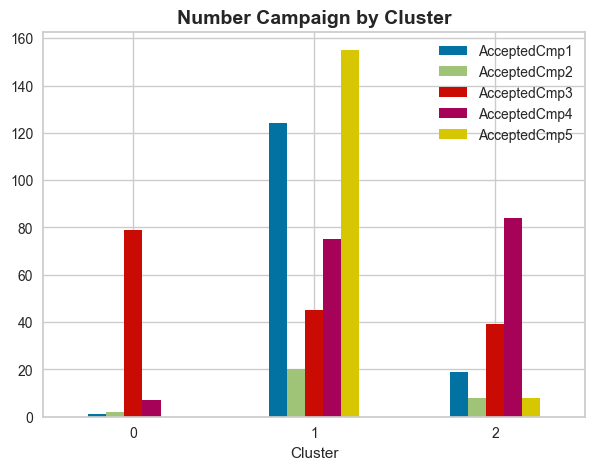

In [34]:
apply_cmp = df_visit.groupby('Cluster').agg({'AcceptedCmp1':'sum',
                                            'AcceptedCmp2':'sum',
                                            'AcceptedCmp3':'sum',
                                            'AcceptedCmp4':'sum',
                                            'AcceptedCmp5':'sum',})

fig, ax = plt.subplots(figsize=(7,5))
apply_cmp.plot(kind='bar', ax = ax)
plt.xticks(rotation=0)
plt.title ('Number Campaign by Cluster',fontsize = 14, weight='bold')
plt.show()

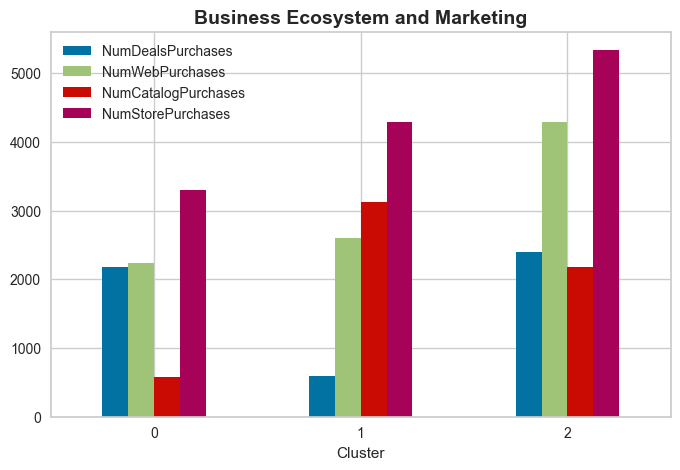

In [35]:
Kunj_dan_Pemb = df_visit.groupby('Cluster').agg({'NumDealsPurchases': 'sum',
                                   'NumWebPurchases': 'sum',
                                   'NumCatalogPurchases': 'sum',
                                   'NumStorePurchases': 'sum'})

fig, ax = plt.subplots(figsize=(8,5))
Kunj_dan_Pemb.plot(kind='bar', ax = ax)
plt.xticks(rotation=0)
plt.title ('Business Ecosystem and Marketing',fontsize = 14, weight='bold')
plt.show()

### Summary Campaign

* Based on the analysis, it is found that the highest monthly visit rate is in Cluster 0 (Poor).

* And the best campaign click-through rate is in Cluster 1, specifically in Campaign No. 5.

* In terms of the business ecosystem and marketing, the concept that has the most impact on sales is the Store.